## Hawaii Holiday Weather Analysis

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

## Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.inspection import inspect
from sqlalchemy import desc

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
#Explore the databases
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

### Measurement DB

In [11]:
#Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()  

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [13]:
#Determine how many dates exist
session.query(func.count(Measurement.date)).all()

[(19550)]

In [14]:
#Earliest date
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [15]:
#Latest date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [16]:
#Print date object 
print(dt.date.today())
print(dt.date(2017, 1, 31))

2019-02-09
2017-01-31


In [17]:
#Print the datetime object
print(dt.datetime.utcnow())
print(dt.datetime(2017, 1, 31))

2019-02-09 20:17:45.700474
2017-01-31 00:00:00


In [18]:
#Calculate a time delta for following 12 month period
# 2016-08-23 through 2017-08-23
start_date = dt.date(2017, 8, 23)
print('Start Date: ', start_date)

query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print('Query Date: ', query_date)

Start Date:  2017-08-23
Query Date:  2016-08-23


In [19]:
#Create query to retrieve the last 12 months of precipitation data.
weather_query = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= query_date).all()
print(weather_query)

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [20]:
#Determine how many dates with data exist in the 12-month period.
session.query(func.count(Measurement.date)).\
    filter(Measurement.date >= query_date).all()

[(2230)]

In [21]:
#Create the date and precipitation lists
date_list = []
prcp_list = []

counter = 0

for w in weather_query:
    counter += 1
    date_list.append(w.date)
    prcp_list.append(w.prcp)

weather_data = {'date': date_list,
                'precipitation': prcp_list}
  

In [22]:
#Create the weather dataframe; set the date as the index.
prcp_df1 = pd.DataFrame(weather_data)
prcp_df1.set_index(prcp_df1['date'], inplace=True)
prcp_df1.head()

,date,precipitation
date,,
2016-08-23,2016-08-23,0.00
2016-08-24,2016-08-24,0.08
2016-08-25,2016-08-25,0.08
2016-08-26,2016-08-26,0.00
2016-08-27,2016-08-27,0.00


In [23]:
#Sort DataFrame values by date.
prcp_df1.sort_values('date')

C:\Users\avargastonsi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


,date,precipitation
date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,NaN
2016-08-23,2016-08-23,1.79
2016-08-23,2016-08-23,0.05
2016-08-23,2016-08-23,0.15
2016-08-23,2016-08-23,0.70
2016-08-23,2016-08-23,0.02
2016-08-24,2016-08-24,0.08
2016-08-24,2016-08-24,2.15


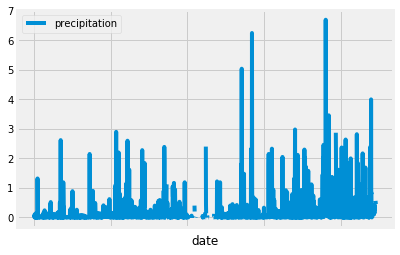

In [24]:
#Create plot
prcp_df1.plot(x_compat=True)
plt.savefig("Images\precp-date.png")
plt.show()

In [27]:
#Calculate summary statistics for the precipitation data
prcp_df2 = prcp_df1[["date", "precipitation"]]
prcp_df2.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### Station DB

In [25]:
#Get a list of column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [26]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()  

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [28]:
#Create a query to calculate the total number of stations
stations = session.query(Station.station).distinct().all()
stations_count = session.query(Measurement.station).distinct().count()
stations_count

9

In [29]:
# What are the most active stations? 
# List the stations and the counts in descending order.
stations_count_desc = session.query(Measurement.station,func.count(Measurement.station).label("stations count")).\
                    group_by(Measurement.station).\
                    order_by(desc("stations count")).\
                    all()
stations_count_desc

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [30]:
#For the station with the highest number of observations, calculate:
#the lowest & highest temps recorded, and average temp
(station_max, count_max) = stations_count_desc[0]
print(station_max, count_max)

station_obs = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                     filter(Measurement.station == station_max).\
                     all()
station_obs

USC00519281 2772


[(54.0, 85.0, 71.66378066378067)]

In [42]:
#For the station with the highest number of temp observations:
#Query the last 12 months
station_query = session.query(Measurement.tobs).\
    filter(Measurement.station >= station_max).all()
print(station_query)

[(65.0,), (63.0,), (74.0,), (76.0,), (73.0,), (70.0,), (64.0,), (68.0,), (73.0,), (64.0,), (61.0,), (66.0,), (65.0,), (68.0,), (64.0,), (72.0,), (66.0,), (66.0,), (69.0,), (67.0,), (67.0,), (71.0,), (67.0,), (76.0,), (68.0,), (72.0,), (70.0,), (67.0,), (66.0,), (67.0,), (69.0,), (67.0,), (67.0,), (64.0,), (69.0,), (73.0,), (73.0,), (69.0,), (69.0,), (69.0,), (71.0,), (61.0,), (69.0,), (63.0,), (64.0,), (65.0,), (67.0,), (68.0,), (65.0,), (76.0,), (75.0,), (66.0,), (70.0,), (72.0,), (73.0,), (70.0,), (71.0,), (72.0,), (72.0,), (69.0,), (70.0,), (73.0,), (72.0,), (73.0,), (70.0,), (71.0,), (68.0,), (70.0,), (72.0,), (69.0,), (68.0,), (74.0,), (72.0,), (72.0,), (73.0,), (74.0,), (73.0,), (73.0,), (74.0,), (74.0,), (74.0,), (71.0,), (72.0,), (75.0,), (75.0,), (75.0,), (75.0,), (73.0,), (73.0,), (71.0,), (71.0,), (68.0,), (70.0,), (71.0,), (74.0,), (71.0,), (75.0,), (76.0,), (75.0,), (75.0,), (76.0,), (76.0,), (76.0,), (77.0,), (77.0,), (73.0,), (74.0,), (76.0,), (76.0,), (80.0,), (74.0,), 

In [43]:
#Create a temps Dataframe with the above results 
new_df = pd.DataFrame(station_query)
new_df

,tobs
0,65.0
1,63.0
2,74.0
3,76.0
4,73.0
5,70.0
6,64.0
7,68.0
8,73.0
9,64.0


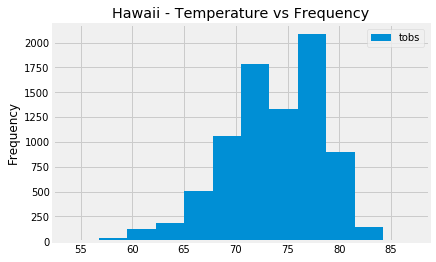

In [50]:
#Create a histogram using the above results
new_df.plot.hist(bins=12,title="Hawaii - Temperature vs Frequency" )
plt.savefig("Images/temp-hist.png")
plt.show()

In [55]:
#Caculate the min, avg, & max temps for the date range you select. 
def calc_temps(start_date, end_date):    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

trip_temps = calc_temps('2015-05-05', '2015-05-20')
print(trip_temps)

[(66.0, 73.75675675675676, 82.0)]


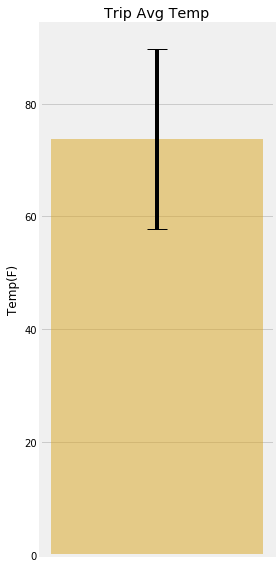

In [59]:
#Plot the above results; title: "Trip Avg Temp" 
#Use the avg temp for the y-value; the peak-to-peak (tmax-tmin) value as the y-error bar (yerr)
min = trip_temps[0][0]
avg = trip_temps[0][1]
max = trip_temps[0][2]

fig,ax=plt.subplots(figsize=plt.figaspect(2.))
xpos=1
bar=ax.bar(xpos,avg,yerr=(max-min), align='center', alpha=0.5, color='goldenrod', capsize=10)
ax.set(xticks=range(xpos),xticklabels='temperature',title='Trip Avg Temp', ylabel='Temp(F)')
fig.tight_layout()
fig.show()

# Save image
fig.savefig("images/trip-avg-temp.png")